<a href="https://colab.research.google.com/github/arnavzz/Stock-Price-Prediction/blob/main/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/IBM.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.374124,7.374124,7.291268,7.291268,1.555767,407940
1,1962-01-03,7.291268,7.355003,7.291268,7.355003,1.569365,305955
2,1962-01-04,7.355003,7.355003,7.278521,7.281708,1.553726,274575
3,1962-01-05,7.272148,7.272148,7.125558,7.138305,1.523128,384405
4,1962-01-08,7.131931,7.131931,6.947100,7.004461,1.494569,572685
...,...,...,...,...,...,...,...
15573,2023-11-13,148.460007,148.490005,147.350006,148.100006,148.100006,2647200
15574,2023-11-14,149.449997,150.809998,149.050003,150.410004,150.410004,4321900
15575,2023-11-15,150.399994,153.220001,150.399994,152.580002,152.580002,4632500
15576,2023-11-16,153.000000,153.350006,152.130005,153.059998,153.059998,3519200


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1962-01-02,7.291268
1,1962-01-03,7.355003
2,1962-01-04,7.281708
3,1962-01-05,7.138305
4,1962-01-08,7.004461
...,...,...
15573,2023-11-13,148.100006
15574,2023-11-14,150.410004
15575,2023-11-15,152.580002
15576,2023-11-16,153.059998


In [ ]:
df['Date']

0        1962-01-02
1        1962-01-03
2        1962-01-04
3        1962-01-05
4        1962-01-08
            ...    
15573    2023-11-13
15574    2023-11-14
15575    2023-11-15
15576    2023-11-16
15577    2023-11-17
Name: Date, Length: 15578, dtype: object

#Conversion (String to Datetime)
Now creating a function to convert string to a datetime object using '*datetime.strptime()*' fuction.


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1962-01-02')
datetime_object

datetime.datetime(1962, 1, 2, 0, 0)


 **Applying str_to_datetime() function to every element in 'Date' column of the dataframe.**


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-13-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1962-01-02
1       1962-01-03
2       1962-01-04
3       1962-01-05
4       1962-01-08
           ...    
15573   2023-11-13
15574   2023-11-14
15575   2023-11-15
15576   2023-11-16
15577   2023-11-17
Name: Date, Length: 15578, dtype: datetime64[ns]

**Assigning this 'Date' column (which is now a list of datetime objects) to the index of the dataframe 'df' using df.index =. This will make the 'Date' column the index of the dataframe, allowing for easier date-based indexing and operations.**

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1962-01-02,7.291268
1962-01-03,7.355003
1962-01-04,7.281708
1962-01-05,7.138305
1962-01-08,7.004461
...,...
2023-11-13,148.100006
2023-11-14,150.410004
2023-11-15,152.580002


**Plotting the data with x-axis as 'Index' column and y-axis as 'Close' column in the dataframe.**


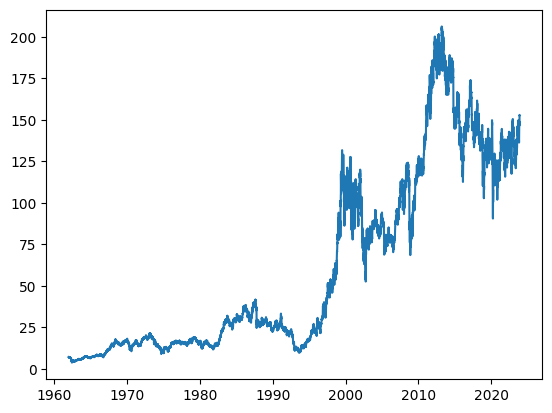

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

# **Windowed Dataframe**

A windowed dataframe is a dataframe that has been divided into smaller windows, each of which is a subset of the original dataframe. This can be useful for performing calculations on subsets of the data, or for visualizing the data in a more granular way.

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '1962-01-05'
windowed_df = df_to_windowed_df(df,
                                '1962-01-05',
                                '2023-11-03',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1962-01-05,7.291268,7.355003,7.281708,7.138305
1,1962-01-08,7.355003,7.281708,7.138305,7.004461
2,1962-01-09,7.281708,7.138305,7.004461,7.087317
3,1962-01-10,7.138305,7.004461,7.087317,7.100064
4,1962-01-11,7.004461,7.087317,7.100064,7.176546
...,...,...,...,...,...
15560,2023-10-30,137.080002,143.759995,142.520004,142.630005
15561,2023-10-31,143.759995,142.520004,142.630005,144.639999
15562,2023-11-01,142.520004,142.630005,144.639999,145.399994
15563,2023-11-02,142.630005,144.639999,145.399994,147.009995


# Windowed Dataframe as input
In the given code, **windowed_df_to_date_X_**  is a function that takes a windowed dataframe as input and returns the corresponding date values, input features X, and output targets Y.

It processes the windowed dataframe and returns the corresponding date values, input features X, and output targets Y.


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((15565,), (15565, 3, 1), (15565,))

# Train Test split

The code us splitting a time series dataset into training, validation, and test sets.


1.  The first 80% of the dates(rows) are used for training the model.
2.  The next 10% of the dates are used for validation.
3.  The remaining 10% of the dates are used for testing the model's predictive capabilities.

The plot visualizes the time series data by showing the original values (before any preprocessing or normalization), along with the split into training, validation, and test sets.

The plot visualizes the time series data by showing the original values (before any preprocessing or normalization), along with the split into training, validation, and test sets.

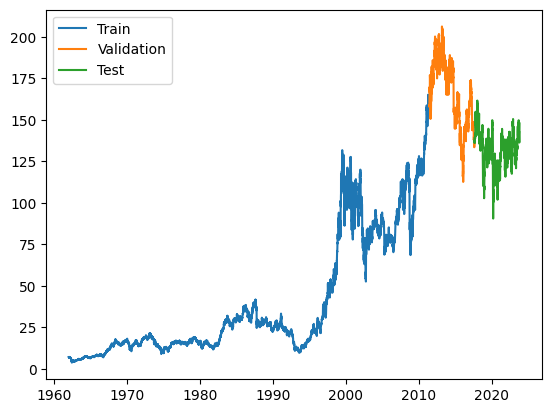

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

# LSTM (Long short-term memory)
LSTM (Long Short-Term Memory) is a recurrent neural network (RNN) architecture widely used in Deep Learning. It excels at capturing long-term dependencies, making it ideal for sequence prediction tasks.

Unlike traditional neural networks, LSTM incorporates feedback connections, allowing it to process entire sequences of data, not just individual data points. This makes it highly effective in understanding and predicting patterns in sequential data like time series, text, and speech.



1.  Creating an LSTm modelwith 64 LSTM units, 32 dense units with ReLU activation, and a final dense layer with 1 output neuron.
2. Compiling the model by specifying the mean squared error(MSE) as the loss function, Adam optimizer with a learning rate of 0.001, and mean absolute error as metric track.
3. Train the model on the training dataset(x_train, y_train) with the validation dataset(x_val, y_val) by fitting the model for 100 epos.





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
390/390 [==============================] - 6s 7ms/step - loss: 618.3520 - mean_absolute_error: 9.6623 - val_loss: 751.6633 - val_mean_absolute_error: 22.0996
Epoch 2/100
390/390 [==============================] - 3s 8ms/step - loss: 1.7733 - mean_absolute_error: 0.7477 - val_loss: 334.6265 - val_mean_absolute_error: 13.5076
Epoch 3/100
390/390 [==============================] - 3s 7ms/step - loss: 1.4456 - mean_absolute_error: 0.7365 - val_loss: 264.8739 - val_mean_absolute_error: 11.8245
Epoch 4/100
390/390 [==============================] - 2s 6ms/step - loss: 1.4706 - mean_absolute_error: 0.7474 - val_loss: 235.9786 - val_mean_absolute_error: 11.1681
Epoch 5/100
390/390 [==============================] - 2s 6ms/step - loss: 1.3404 - mean_absolute_error: 0.6831 - val_loss: 223.5178 - val_mean_absolute_error: 10.7924
Epoch 6/100
390/390 [==============================] - 3s 7ms/step - loss: 1.3116 - mean_absolute_error: 0.6789 - val_loss: 219.9421 - val_mean_absolute_error

# Predicting Stock Prices
The LSTM model is used to predict the closing stock prices of a company based on the training dataset. The predicted stck prices **(train_predictions)** and the actual prices **(y_train)** are plotted against the corresponding dates **(dates_train)**.

390/390 [==============================] - 1s 2ms/step


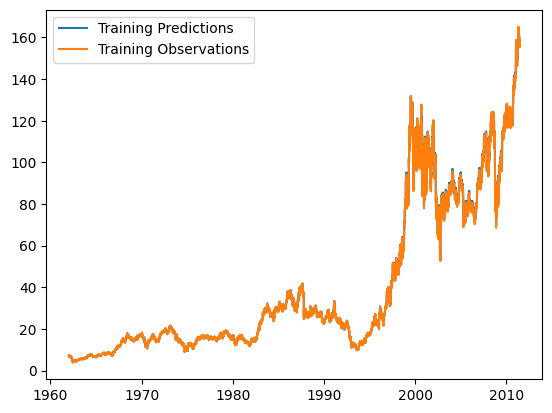

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
y_train.shape

(12452,)

In [ ]:
train_predictions.shape

(12452,)

# Validation dataset plot
Plotting the predicted ans actual stock prices from the validataion set with use of trained LSTM model. The plot allow us to visually inspect the performane of the LSTM model. It shows how well the mode can predict the future stock prices based on the past data.

49/49 [==============================] - 0s 2ms/step


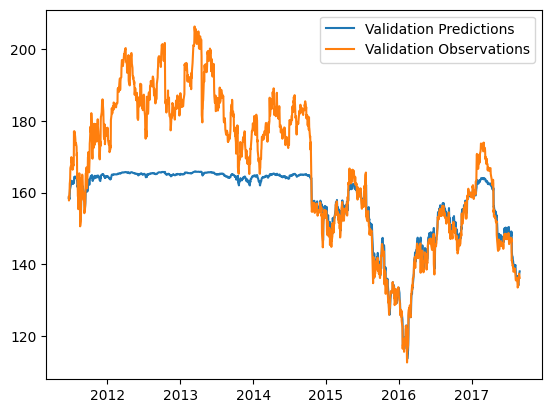

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

# Test dataset prediction
The LSTM model is applied over the testing dataset for testing the performance of a trained model on unseen data. It predicts the future values id a target variable using the X_test feature matrix. The prediction are then flattened into a one_dimensional arry using .flatten() method.

49/49 [==============================] - 0s 3ms/step


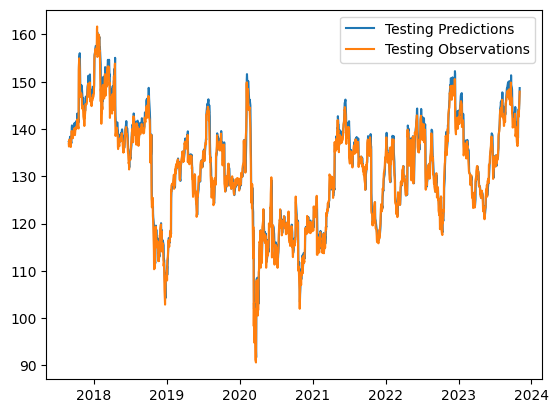

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

# Visualizing Predictions

We are visualizing the actual and predicted values of a time series mdoel. We are using matplotlib's pyplot module (plt) to plot these values against their respectives dates.

It is used ot compare the actual and predicted values of the model and also helpful in understanding the trends in the data.

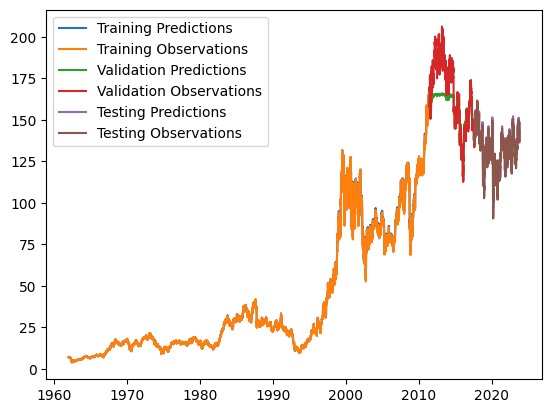

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
df

,Close
Date,
1962-01-02,7.291268
1962-01-03,7.355003
1962-01-04,7.281708
1962-01-05,7.138305
1962-01-08,7.004461
...,...
2023-11-13,148.100006
2023-11-14,150.410004
2023-11-15,152.580002


In [ ]:
# Start day second time around: '2022-11-07'
windowed_df = df_to_windowed_df(df,
                                '2022-11-07',
                                '2023-11-03',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-11-07,136.830002,134.470001,136.960007,138.339996
1,2022-11-08,134.470001,136.960007,138.339996,140.039993
2,2022-11-09,136.960007,138.339996,140.039993,137.389999
3,2022-11-10,138.339996,140.039993,137.389999,141.229996
4,2022-11-11,140.039993,137.389999,141.229996,143.169998
...,...,...,...,...,...
245,2023-10-30,137.080002,143.759995,142.520004,142.630005
246,2023-10-31,143.759995,142.520004,142.630005,144.639999
247,2023-11-01,142.520004,142.630005,144.639999,145.399994
248,2023-11-02,142.630005,144.639999,145.399994,147.009995


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

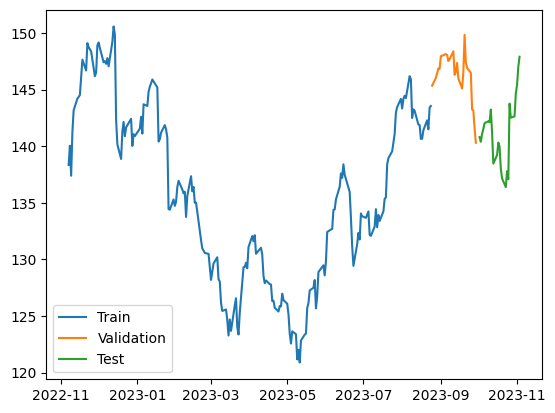

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 101ms/step - loss: 18287.7109 - mean_absolute_error: 135.0132 - val_loss: 21153.3691 - val_mean_absolute_error: 145.4265
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 18146.6152 - mean_absolute_error: 134.4904 - val_loss: 20992.0430 - val_mean_absolute_error: 144.8708
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 17987.1641 - mean_absolute_error: 133.8957 - val_loss: 20791.4141 - val_mean_absolute_error: 144.1767
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 17774.1172 - mean_absolute_error: 133.0983 - val_loss: 20511.4531 - val_mean_absolute_error: 143.2025
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 17492.6660 - mean_absolute_error: 132.0367 - val_loss: 20168.1582 - val_mean_absolute_error: 141.9988
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 17141.8340 - mean_absolute_error: 130.7019 - val_loss: 19

7/7 [==============================] - 0s 4ms/step


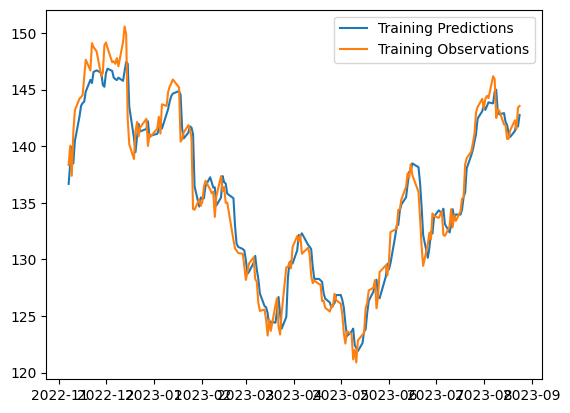

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 25ms/step


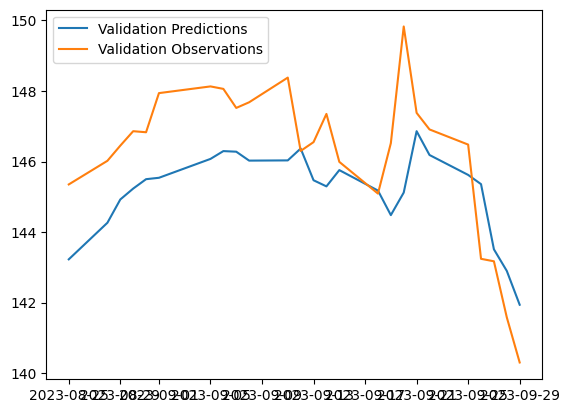

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 26ms/step


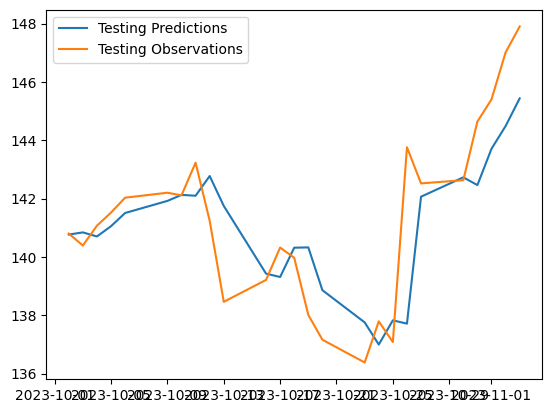

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

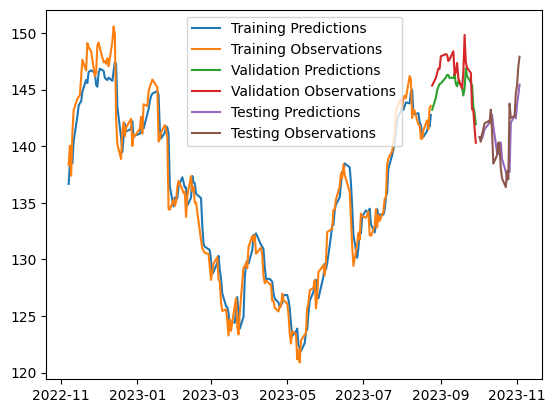

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 37ms/step


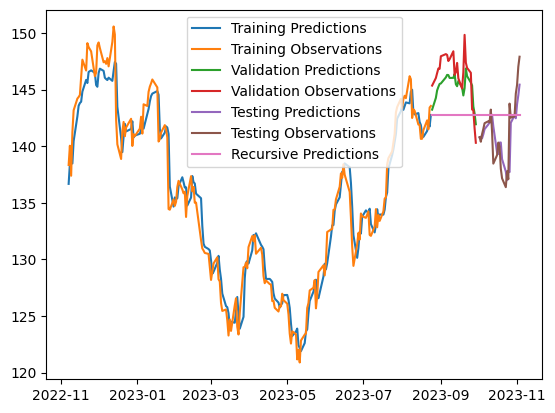

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])